In [25]:
# Importing Packages
import requests
import json
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [26]:
#----------------Gathering Data-------

#--------Gathering Data Source 1 : Twitter Arhive Enhanced
raw_data = pd.read_csv(r'twitter-archive-enhanced.csv')
data = raw_data.copy()

In [ ]:
#-----Gathering Data Source 2 : Tweepy Data into tweet_json.txt
import tweepy

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth,wait_on_rate_limit=True, wait_on_rate_limit_notify=True)


import time

start = time.time()

count = 0
with open('tweet_json.txt', 'w', newline='\n') as outfile:
    for tweetID in data['tweet_id']:
        print(count+1)
        count = count + 1
        try:
            t = api.get_status(tweetID, tweet_mode='extended')
            temp_json = {'id': tweetID,
                         'retweet_count': t.retweet_count,
                         'favorite_count':t.favorite_count
                    }
            outfile.write(str(temp_json) + '\n')
        except:
            temp_json = {'id': tweetID,
                         'retweet_count': 0,
                         'favorite_count':0
                    }
            print("No Data for" + str(tweetID))
            outfile.write(str(temp_json) + '\n')
            continue

end = time.time()

print(end - start)


In [27]:
with open('tweet_json.txt') as json_file: 
    status = []
    for line in json_file:
        status.append(json.loads(line))
        
raw_json_data = pd.DataFrame(status)
json_data = raw_json_data.copy()

In [28]:
#---------------Gathering Data Source 3 : Downloading Image predictions file ------------------------------------

url =  'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
response = requests.get(url)

with open('image-predictions.tsv', mode='wb') as file:
    file.write(response.content)
raw_image_pred = pd.read_csv(r'image-predictions.tsv',sep ='\t')
image_pred = raw_image_pred.copy()

In [7]:
#----------------------Assesment--------------------------------
#------Data Source 1 Assesment-------
data.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [8]:
data.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [10]:
#------Data Source 2 Assesment-------
json_data.head()

,favorite_count,id,retweet_count
0,37694,892420643555336193,8213
1,32375,892177421306343426,6075
2,24383,891815181378084864,4017
3,41010,891689557279858688,8370
4,39210,891327558926688256,9075


In [11]:
json_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
favorite_count    2356 non-null int64
id                2356 non-null int64
retweet_count     2356 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


In [12]:
json_data.describe()

,favorite_count,id,retweet_count
count,2356.000000,2.356000e+03,2356.000000
mean,7825.305603,7.427716e+17,2874.951188
std,12188.911583,6.856705e+16,4872.332821
min,0.000000,6.660209e+17,0.000000
25%,1327.000000,6.783989e+17,570.750000
50%,3404.500000,7.196279e+17,1341.000000
75%,9625.000000,7.993373e+17,3358.250000
max,162711.000000,8.924206e+17,82799.000000


In [13]:
#------Data Source 3 Assesment-------
image_pred.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [14]:
image_pred.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [15]:
image_pred.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


#----------------------Quality & Tidiness Issues----------------

Tidiness:
1. 'expanded_urls' does not provide any significance in 'twitter-archive-enhanced.csv’.
	Denominator ratings are all common for all tweets, hence no information can be retrieved.
	Expanded URLs provide no value as we already have all the data.
2.	Columns 'in_reply_to_status_id', 'in_reply_to_user_id', 'retweeted_status_id', 'retweeted_status_timestamp' all provide redundant information in 'twitter-archive-enhanced.csv’.
3.	Removed duplicate jpeg url from ‘image-predictions.tsv’. 
4.	Combining dog breed from image-predictions.tsv into master database.
	Dog breed predicted by neural net were imported into 'twitter-archive-enhanced.csv’.
5.	Imported favourite and retweet count into master database from tweepy for easy visualization.
	Using ‘Tweepy’ API, favourite and retweet count were extracted from JSON for the ‘tweet_id’ in 'twitter-archive-enhanced.csv’and used.
6.  Stages of dog(doggo, floofer etc) mentioned in twitter_archive_enhanced.csv have been changed from four columns into one

Quality:
1.	Sources of tweet can be modified into one word.
	Instead of entire text which is hard to interpret , one word such as iPhone or web can be written.
2.	Removed rows where no dog predictions (p1_dog & p2_dog & p3_dog are all False) were there from ‘image-predictions.tsv’.
	Since we are only concerned with dogs , I removed rows where the neural net predicted no dogs in all three cases.
	If at least one dog was predicted regardless of the confidence, that row was retained.
3.	Selecting the predicted dog breed with strongest confidence from image-predictions.tsv and removed others from ‘image-predictions.tsv’.
	Since we have multiple ‘dog_breed’ columns which are predicted , I selected the one which was correctly predicted as dog and had the highest confidence.
4.	Removed retweeted tweets.
	Retweeted tweets provide no valuable information and hence removed.
5.	Correcting numerator rating, i.e. removed ratings >14 & < 1.
	Numerators usually have a range from 1-14, high ratings are unusualy, It can be any other number mentioned in the tweet, hence these were removed.
6.	Fixed the names of dog, removed names starting with lower case letter.
	Names column of dogs contained irregular data, names usually start with uppercase letter. Those names starting with lower case letter were removed.
7.  Removed rows with denominator rating other than 10
8.  Removed Deleted Tweets. Deleted Tweets have Retweet_count and favorite_count as Zero

In [29]:
#-------Data Cleaning--------------------------------------------------------------

image_pred.nunique()

#Define---------Tidiness Issue 3: Dropping same url----

#Code
image_pred.drop_duplicates(subset = ['jpg_url'], inplace = True)

#Test
image_pred.nunique()


tweet_id    2009
jpg_url     2009
img_num        4
p1           378
p1_conf     2006
p1_dog         2
p2           405
p2_conf     2004
p2_dog         2
p3           408
p3_conf     2006
p3_dog         2
dtype: int64

In [30]:
#Define---------Quality Issue 2 :Removing Wrong Predictions of Dogs

#Code
image_pred = image_pred.query('p1_dog == True or p2_dog == True or p3_dog == True')

#Test

temp = image_pred.query('p1_dog == False and p2_dog == False and p3_dog == False')
temp

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog


In [31]:
#--------Removing Unnecessary Columns----
image_pred.drop(['img_num','jpg_url','p1_conf','p2_conf','p3_conf'], axis = 1, inplace = True)

#Define-----Quality Issue 3 : Selecting the predicted dog with strongest confidence---
#Code
image_pred.reset_index(drop = True, inplace = True)
col = ['p1_dog','p2_dog','p3_dog']
flag = [False] * image_pred.shape[0]
dog_breed = []
for i in range(image_pred.shape[0]):
    for c in col:
        if ((not flag[i]) & image_pred[c][i]):
            flag[i]= True
            dog_breed.append(image_pred[c[0:2]][i])
            break

dog_breed = pd.Series(dog_breed)
image_pred['dog_breed'] = dog_breed

#----------Drop Remaining Columns----
image_pred.drop(['p1','p1_dog','p2','p2_dog','p3','p3_dog',], axis = 1, inplace = True) 

#Test
image_pred.head(3)

,tweet_id,dog_breed
0,666020888022790149,Welsh_springer_spaniel
1,666029285002620928,redbone
2,666033412701032449,German_shepherd


In [32]:
#Define------------- Tidiness Issue 5 : Merging Tweepy Data ----------------------------------------------------------------------------------------------------------------

#Code
data = data.merge(json_data,left_on='tweet_id',right_on='id',how='left')

#Test
data.head(3)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,id,retweet_count
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None,37694,892420643555336193,8213
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None,32375,892177421306343426,6075
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None,24383,891815181378084864,4017


In [33]:
#Define---- Tidiness Issue 6: Combining Dog Type columns into One--------

#Code
dog_types = ['doggo', 'floofer', 'pupper' , 'puppo']
temp = []
for x in range(data.shape[0]):
    flag = False
    for col in dog_types:
        if data[col][x] != 'None':
            if not flag:
                temp.append(data[col][x])
                flag = True
            continue
        else:
            if flag:
                continue
    if not flag:
        temp.append('None')
        
temp = pd.DataFrame(temp)
temp.columns = ['dog_type']
temp['tweet_id'] = data['tweet_id']

#---------Merging Dog Type Columns
data = data.merge(temp,left_on='tweet_id',right_on='tweet_id',how='left')


#Test
data.head(3)



,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,...,rating_denominator,name,doggo,floofer,pupper,puppo,favorite_count,id,retweet_count,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,...,10,Phineas,None,None,None,None,37694,892420643555336193,8213,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,...,10,Tilly,None,None,None,None,32375,892177421306343426,6075,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,...,10,Archie,None,None,None,None,24383,891815181378084864,4017,None


In [34]:
#Define---------Tidiness Issue 1 & 2:

#Code
data.drop(['id','doggo', 'floofer', 'pupper' , 'puppo','expanded_urls','in_reply_to_status_id', 'in_reply_to_user_id','retweeted_status_id', 'retweeted_status_timestamp'], axis= 1, inplace = True)

#Test
data.head(3)

,tweet_id,timestamp,source,text,retweeted_status_user_id,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,13,10,Phineas,37694,8213,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,13,10,Tilly,32375,6075,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,12,10,Archie,24383,4017,None


In [35]:
#Define------------------------Quality Issue 1 : Sources into One Word------------------------------------------------

#Code
data['source'].value_counts()
sources = ['iPhone', 'Web', 'Vine', 'TweetDeck']
temp = ['None'] * data.shape[0]
for x in sources:
    for y in range(data.shape[0]):
        if x in data['source'][y]:
            temp[y] = x

del x
del y
data['source'] = pd.Series(temp)

del temp

#Test
data['source'][0:5]

0    iPhone
1    iPhone
2    iPhone
3    iPhone
4    iPhone
Name: source, dtype: object

In [36]:
#Define-----------------Quality Issue 4 : Removing Retweeted Statuses--------------------------------------------

#Code
data = data[data['retweeted_status_user_id'].isnull()]
data.reset_index(drop = True, inplace = True)
data.drop(['retweeted_status_user_id'], axis = 1, inplace = True)

#Test
data.head(3)



,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,37694,8213,None
1,892177421306343426,2017-08-01 00:17:27 +0000,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,32375,6075,None
2,891815181378084864,2017-07-31 00:18:03 +0000,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,24383,4017,None


In [37]:
#Define----Tidiness Issue 4: Dog breed from image_predictions.tsv into master database-------------------------------
#Code
temp = ['NA'] * data.shape[0]
for x in range(data.shape[0]):
    if str(data['tweet_id'][x]) in str(image_pred['tweet_id']):
        row = image_pred.index[image_pred['tweet_id'] == data['tweet_id'][x]].tolist()
        #print(row[0])
        temp[row[0]] = image_pred['dog_breed'][row[0]]
#data['dog_breed'] = pd.Series(temp)
temp = pd.DataFrame(temp)
temp.columns = ['dog_breed']
temp['tweet_id'] = image_pred['tweet_id']

#Merging Dog Breed Columns 
data = data.merge(temp,left_on='tweet_id',right_on='tweet_id',how='left')

del temp
del x
del row


#Test
data.head(3)

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_type,dog_breed
0,892420643555336193,2017-08-01 16:23:56 +0000,iPhone,This is Phineas. He's a mystical boy. Only eve...,13,10,Phineas,37694,8213,None,NaN
1,892177421306343426,2017-08-01 00:17:27 +0000,iPhone,This is Tilly. She's just checking pup on you....,13,10,Tilly,32375,6075,None,NaN
2,891815181378084864,2017-07-31 00:18:03 +0000,iPhone,This is Archie. He is a rare Norwegian Pouncin...,12,10,Archie,24383,4017,None,Chihuahua


In [38]:
#Define-----------Quality Issue 5 :Numerator Rating Fix--------------------------------------------------

#Code
data['rating_numerator'].value_counts()
data = data.query('rating_numerator > 1 and rating_numerator < 15')
data.reset_index(drop = True, inplace = True)


#Test
data['rating_numerator'].describe()

count    2139.000000
mean       10.649836
std         2.112231
min         2.000000
25%        10.000000
50%        11.000000
75%        12.000000
max        14.000000
Name: rating_numerator, dtype: float64

In [39]:
#Define-----------Quality Issue 7 :Denominator Rating Fix--

#Code
data = data.query('rating_denominator == 10')
data.reset_index(drop = True, inplace = True)

#Test
data['rating_denominator'].describe()

count    2134.0
mean       10.0
std         0.0
min        10.0
25%        10.0
50%        10.0
75%        10.0
max        10.0
Name: rating_denominator, dtype: float64

In [40]:
#Define--------------Quality Issue 6 : Name Fix--------------------------------------------------------

#Code
data['name'].value_counts()
data['name'].nunique()

temp = data['name']
for x in range(data.shape[0]):
    if temp[x][0].islower():
        temp[x] = 'None'

data['name'] = temp
del temp
del x


#Test
data['name'].head(5)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.


0     Phineas
1       Tilly
2      Archie
3       Darla
4    Franklin
Name: name, dtype: object

In [41]:
#Define-----Quality Issue 8 : Removing Deleted Tweeets

#Code
data = data.query('favorite_count != 0 & retweet_count != 0')
data.reset_index(drop = True, inplace = True)

#Test
temp = data.query('favorite_count == 0 & retweet_count == 0')
temp

,tweet_id,timestamp,source,text,rating_numerator,rating_denominator,name,favorite_count,retweet_count,dog_type,dog_breed


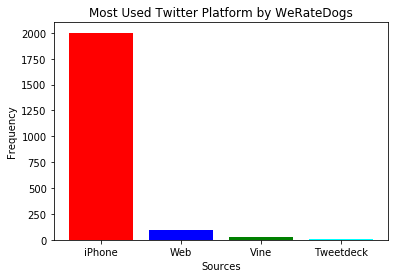

In [42]:
#--------------Master CSV------------------------------------------------------

data.to_csv('twitter_archive_master.csv',index= False, encoding='utf-8')

#------------------Analyse & Visualization----------------------------------------------------

#Question & Insight 1 :Most Used Twitter Platform by WeRateDogs
sources = ['iPhone', 'Web', 'Vine', 'Tweetdeck']
sources_count = data['source'].value_counts().tolist()
plt.bar(np.arange(4), sources_count, tick_label = sources, color = ['red','blue','green','cyan'])
plt.xlabel('Sources')
plt.ylabel('Frequency')
plt.title('Most Used Twitter Platform by WeRateDogs')
plt.show()

In [43]:
#Question & Insight 2: Which Dog Types are most famous (Average Values for all Parameters)
dog_type_famous = data.groupby(['dog_type']).mean()
dog_type_famous.drop('tweet_id', axis =1,inplace = True)
dog_type_famous

,rating_numerator,rating_denominator,favorite_count,retweet_count
dog_type,,,,
None,10.568233,10.0,8121.349553,2438.590604
doggo,11.770115,10.0,17456.574713,6040.827586
floofer,11.888889,10.0,10516.777778,3878.555556
pupper,10.735426,10.0,6907.479821,2311.816143
puppo,12.041667,10.0,20746.458333,6066.250000


In [44]:
# Question & Insight 3: Top 5 Dog Breeds whih are most favourite (Average Values for all Parameters)
dog_breed_famous = data.groupby(['dog_breed']).mean()
dog_breed_famous.drop('tweet_id', axis =1,inplace = True)
dog_breed_famous

,rating_numerator,rating_denominator,favorite_count,retweet_count
dog_breed,,,,
Blenheim_spaniel,12.000000,10.0,16037.000000,3335.000000
Chesapeake_Bay_retriever,11.500000,10.0,9937.500000,1531.500000
Chihuahua,11.333333,10.0,19581.000000,3873.333333
English_setter,11.000000,10.0,76.000000,11.000000
French_bulldog,12.000000,10.0,22742.666667,3618.666667
Gordon_setter,9.000000,10.0,142.000000,58.000000
Irish_terrier,13.000000,10.0,27096.000000,4133.000000
Italian_greyhound,11.000000,10.0,170.000000,76.000000
Labrador_retriever,13.000000,10.0,41010.000000,8370.000000


In [45]:
#Question & Insight 4 : Most Common Dog Name
common_dog_name = data.groupby(['name']).count().sort_values(by=['tweet_id'], ascending = False)['tweet_id'][0:6]
common_dog_name

name
None       749
Lucy        11
Cooper      10
Oliver      10
Charlie     10
Tucker       9
Name: tweet_id, dtype: int64

In [46]:
#Average Likes & Retweets & Ratings of each tweet
avg_likes = data['favorite_count'].mean()
avg_retweets = data['retweet_count'].mean()
avg_rating = data['rating_numerator'].mean()
avg_likes,avg_retweets,avg_rating

(8527.7470671046449, 2619.3261379633973, 10.656968559361802)

(-1.1217317648172758,
 1.1010348459436798,
 -1.1180700863417294,
 1.1105257663924291)

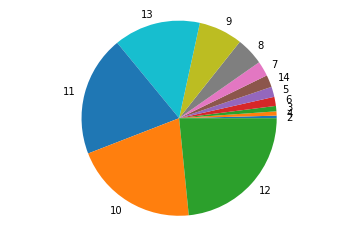

In [47]:
#Question & Insight 6: Plot of Ratings Given
ratings_given_count = data.groupby(['rating_numerator']).count().sort_values(by=['tweet_id'], ascending = True)['tweet_id'].tolist()
ratings = data.groupby(['rating_numerator']).count().sort_values(by=['tweet_id'], ascending = True)['tweet_id'].index.values.tolist()
fig1, ax1 = plt.subplots()
ax1.pie(ratings_given_count, labels=ratings)
ax1.axis('equal')